# Exploring MP structure

Refeyn MP files have the HDF5 structure. This notebook displays the structure and code

In [2]:
## import libraries and define the tree dump function

import pathlib
import h5py

def h5_tree(val, pre=''):
    items = len(val)
    print(items)
    for key, val in val.items():
        items -= 1
        if items == 0:
            # the last item
            if type(val) == h5py._hl.group.Group:
                print(pre + '└── ' + key)
                h5_tree(val, pre+'    ')
            else:
                print(pre + '└── ' + key + '--', val)
        else:
            if type(val) == h5py._hl.group.Group:
                print(pre + '├── ' + key)
                h5_tree(val, pre+'│   ')
            else:
                print(pre + '├── ' + key + '--', val)

In [4]:
print(filepath)

/Users/aquiles/Documents/Programs/refeyn/011_500mVpp_1Hz.mp


In [5]:
data_folder = pathlib.Path("/Users/aquiles/Documents/Programs/refeyn")

filename = pathlib.Path("015_100mVpp 1Hz.mp")

filepath = data_folder/filename

with h5py.File(filepath, 'r') as hf:
    print(hf)
    h5_tree(hf)

<HDF5 file "015_100mVpp 1Hz.mp" (mode r)>
4
├── analysis
1
│   └── format_version_number-- <HDF5 dataset "format_version_number": shape (), type "<i4">
├── display
1
│   └── format_version_number-- <HDF5 dataset "format_version_number": shape (), type "<i4">
├── format_version_number-- <HDF5 dataset "format_version_number": shape (), type "<i4">
└── movie
18
    ├── app_info
6
    │   ├── email-- <HDF5 dataset "email": shape (), type "|O">
    │   ├── name-- <HDF5 dataset "name": shape (), type "|O">
    │   ├── publisher-- <HDF5 dataset "publisher": shape (), type "|O">
    │   ├── url-- <HDF5 dataset "url": shape (), type "|O">
    │   ├── version-- <HDF5 dataset "version": shape (), type "|O">
    │   └── version_sha-- <HDF5 dataset "version_sha": shape (), type "|O">
    ├── autofocus
2
    │   ├── ringRadius-- <HDF5 dataset "ringRadius": shape (5094,), type "<f8">
    │   └── systemTimestamp-- <HDF5 dataset "systemTimestamp": shape (5094,), type "<f8">
    ├── comments-- <HDF5 dat

In [6]:
hf = h5py.File(filepath, 'r')
data = hf["movie/frame"][()]
print (data.shape)

(5094, 128, 128)


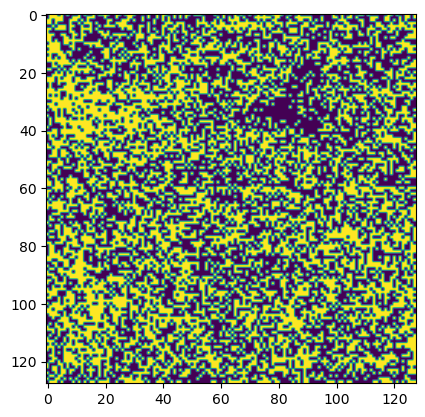

In [9]:
import matplotlib.pyplot as plt
plt.imshow(data[1000,:,:]-data[999,:,:])
plt.show()

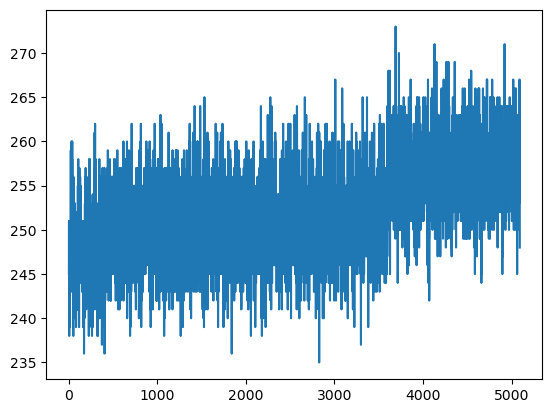

In [10]:
plt.plot(data[:, 60, 60])